In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.data"
url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/image/segmentation.test"

In [ ]:
cols = ["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", "SHORT-LINE-DENSITY-5", "SHORT-LINE-DENSITY-2", "VEDGE-MEAN", "VEDGE-SD", 
        "HEDGE-MEAN", "HEDGE-SD", "INTENSITY-MEAN","RAWRED-MEAN","RAWBLUE-MEAN","RAWGREEN-MEAN","EXRED-MEAN","EXBLUE-MEAN","EXGREEN-MEAN","VALUE-MEAN","SATURATION-MEAN","HUE-MEAN"]

In [ ]:
data1 = pd.read_csv(url1, header=2, names=cols)
data2 = pd.read_csv(url2, header=2, names=cols)
data = pd.concat([data1, data2])

In [ ]:
X1 = data.iloc[:, 4:9]
X2 = data.iloc[:, 10:20]
X3 = data.drop(["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
Y = data["CLASS"]

### Questão 2 - Item iv) - Regressão Logística

In [ ]:
# Instanciação do dataframe para o teste de Friedman.
d = {'Bayesiano Gaussiano': [0.0] * 5, 'K-Vizinhos': [0.0] * 5, 'Parzen': [0.0] * 5, 'Regressão Logistica': [0.0] * 5, 'Voto Majoritario': [0.0] * 5}
tabela_rankings = pd.DataFrame(data=d)

In [ ]:
# Preparação dos dados
X1 = data.iloc[:, 4:9]
Y = data["CLASS"]

X2 = data.iloc[:, 10:20]
Y = data["CLASS"]

X3 = data.drop(["CLASS", "REGION-CENTROID-COL", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT"], axis=1)
Y = data["CLASS"]

dataset =[(X1,Y),(X2,Y),(X3,Y)]

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

https://machinelearningmastery.com/voting-ensembles-with-python/

A votação é um método de ensemble que combina os desempenhos de vários modelos para fazer previsões. Em problemas de classificação, existem dois tipos de votação: votação forte e votação suave.

A votação forte (hard voting) envolve escolher a previsão com o maior número de votos, enquanto a votação suave (soft voting) envolve combinar as probabilidades de cada previsão em cada modelo e escolher a previsão com a maior probabilidade total. Dessa forma, para o voto majoritario usaremos a votação forte.

Usaremos o parâmetro multi_class com valor "ovr" (one-versus-rest) para determinar a estratégia de "um contra todos".

Podemos criar uma função chamada get_voting() que cria cada modelo lr e combina os modelos em um ensemble de votação forte.

>lr1 0.319 (0.029)
>lr2 0.319 (0.029)
>lr3 0.319 (0.029)
>hard_voting 0.319 (0.029)
>lr1 0.824 (0.021)
>lr2 0.823 (0.021)
>lr3 0.823 (0.021)
>hard_voting 0.823 (0.021)
>lr1 0.861 (0.020)
>lr2 0.859 (0.020)
>lr3 0.859 (0.021)
>hard_voting 0.859 (0.021)


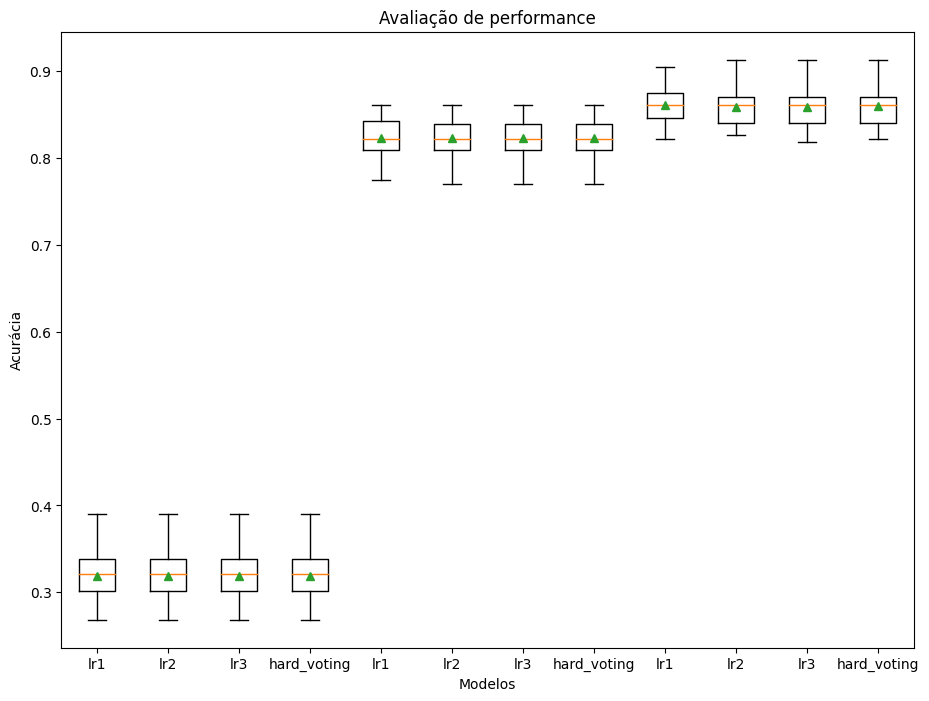

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# obter voting ensemble dos modelos
def get_voting():
	
# definir os modelos
  models = list()
  models.append(('lr1', LogisticRegression(multi_class='ovr', C=1.0, max_iter=100,random_state=42)))
  models.append(('lr2', LogisticRegression(multi_class='ovr', C=1.0, max_iter=500,random_state=42)))
  models.append(('lr3', LogisticRegression(multi_class='ovr', C=1.0, max_iter=1000,random_state=42)))
  # definir o voting ensemble
  ensemble = VotingClassifier(estimators=models, voting='hard')
  return ensemble

# obter a lista dos modelos para avaliação
def get_models():
	models = dict()
	models['lr1'] = LogisticRegression(multi_class='ovr', C=1.0, max_iter=100,random_state=42)
	models['lr2'] = LogisticRegression(multi_class='ovr', C=1.0, max_iter=500,random_state=42)
	models['lr3'] = LogisticRegression(multi_class='ovr', C=1.0, max_iter=1000,random_state=42)
	models['hard_voting'] = get_voting()
	return models

# avaliar um modelo usando validação cruzada
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# obter os modelos para avaliação
models = get_models()

# avaliar os modelos e armazenar resultados
results, names = list(), list()

for X, y in dataset:
  for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


# plotar a performance dos modelo para comparação
pyplot.figure(figsize=(11,8))
pyplot.title('Avaliação de performance')
pyplot.xlabel('Modelos')
pyplot.ylabel('Acurácia')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()